# Part 4
In questa esercitazione si effettua una sperimentazione numerica relativa ai metodi per il calcolo di zeri di funzione. Sarà necessario impiegare il calcolo simbolico.

In [1]:
pkg load symbolic

## Metodo di bisezione

In [2]:
function [sol, appr, nit] = bisezione(fun, a, b, tolx)

fun_a = fun(a);
fun_b = fun(b);

if(sign(fun(a)) == sign(fun(b)))
   error("Teorema degli Zeri non applicabile"); 
end

nit = 0;
exit = 0;
maxit = ceil((log(fun_b - fun_a) / tolx) / log(2));
appr = zeros(1, 10); % preallocazione

while exit == 0 && nit <= maxit ...
    && abs(b - a) >= tolx + eps * max(abs(a), abs(b))
    
    nit = nit + 1;
    appr(nit) = a + (b - a) / 2; % ascissa
    fun_app = fun(appr(nit)); % ordinata
    
    if(sign(fun_app)) == sign(fun_a) % sposto a verso destra
        a = appr(nit);
        fun_a = fun_app;
    elseif(sign(fun_app) == sign(fun_b)) % sposto b verso sinistra
        b = appr(nit);
        fun_b = fun_app;
    end
    
    if(fun(appr) == 0)
        exit = 1;
    end
end

sol = appr(nit);

end

## Metodo della regula falsi

Calcola lo zero di una funzione usando il metodo della falsa posizione.
  
    By chance to truth you may procede,
    And first work by the question,
    Although no truth therein be done.
    Such falsehood is a so good ground,
    That truth by it will soon be found.

Ground of Artes, di Robert Recorde (ca. 1542). Estratto da [qui](https://en.wikipedia.org/wiki/Regula_falsi).

In [3]:
function [sol, appr, nit] = regula_falsi(fun, a, b, tolx, maxit)

% valutazione agli estremi
fun_a = fun(a);
fun_b = fun(b);

if(sign(fun_a) == sign(fun_b))
   error("Teorema degli Zeri non applicabile") 
end

nit = 0;
exit = 0;
fun_app = fun_a;
appr = zeros(1, 10);

% due criteri di arresto, uno sul massimo numero di iterazioni,
% l'altro sul controllo di |tol|, considerando |eps|
while exit == 0 && nit <= maxit ...
    && abs(b - a) >= tolx + eps * max(abs(a), abs(b))
    %%&& abs(fun_app) >= tolx

    nit = nit + 1;
    
    % calcolo intersezione con l'asse x della retta che
    % congiunge gli estremi a e b
    appr(nit) = a - fun_a * (b - a) / (fun_b - fun_a);
    fun_app = fun(appr(nit));
    
    if(fun_app == 0) % lo zero è stato trovato
        exit = 1;
    end
    
    % aggiornamento sotto-intervallo di sinistra
    if(sign(fun_app) == sign(fun_a)) 
        a = appr(nit);
        fun_a = fun_app;
    % aggiornamento sotto-intervallo di destra
    elseif(sign(fun_app) == sign(fun_b))
        b = appr(nit);
        fun_b = fun_app;
    end    
end

if(nit == maxit)
   disp("Raggiunto il massimo numero di iterazioni") 
end

% l'ultima approssimazione è la migliore soluzione 
% a cui si è giunti in maxit
sol = appr(nit);

end

## Metodo delle corde

Calcola lo zero di una funzione usando il metodo delle corde. A differenza del metodo delle tangenti la pendenza è costante. Richiede il calcolo della derivata della funzione di cui si vuole trovare lo zero.

In [4]:
function [sol, appr, nit] = corde(fun, fun_der, x_i, tolx, tolf, maxit)

nit = 1;
m = fun_der(x_i); % calcolo della pendenza costante
appr(nit) = x_i - fun(x_i) / m; % primo passo di iterazione
fun_i = fun(appr(nit)); % prima approssimazione locale

while nit < maxit && abs(fun_i / m) >= tolx * abs(appr(nit)) ...
        && abs(fun_i) >= tolf
    x_i = appr(nit);

    temp = x_i - fun_i / m;
    fun_i = fun(temp);
    
    nit = nit + 1;
    appr(nit) = temp;
end

if(maxit == nit)
   disp("Raggiunto massimo numero di iterazioni");
end

sol = appr(nit);

end

## Metodo delle tangenti

Usa il metodo di Newton per calcolare lo zero di una funzione. A differenza del metodo delle secanti si ricalcola la pendenza ad ogni iterazione. Richiede il calcolo della derivata della funzione di cui si vuole trovare lo zero.

In [49]:
function [sol, appr, nit] = newton(fun, fun_der, x_i, tolx, tolf, maxit)

m_i = fun_der(x_i); % inizializzazione della pendenza

if(abs(m_i) <= eps)
   fprintf('Derivata nulla in x_0, uscita...\n')
   sol = 0;
   appr = 0;
   nit = 0;
   return
end

temp  = x_i - fun(x_i) / m_i; % primo passo di iterazione
fun_i = fun(temp); % prima approssimazione locale

nit = 1;
appr(nit) = temp;

% tre criteri di arresto, il primo sul numero di iterazioni massime,
% il secondo su
while nit < maxit && abs(fun_i / m_i) >= tolx * abs(appr(nit)) ...
    && abs(fun_i) >= tolf

    x_i = appr(nit);

    m_i = fun_der(x_i); % ricalcolo della pendenza
    if(abs(m_i) <= eps)
        fprintf('Derivata nulla in x_0, uscita...\n')
        sol = appr(nit);
        return
    end
    
    temp = x_i - fun_i / m_i; % calcolo nuova soluzione
    fun_i = fun(temp); 
    
    nit = nit + 1;
    appr(nit) = temp;
end

if(maxit == nit)
   disp("Raggiunto massimo numero iterazioni") 
end

sol = appr(nit);

end

## Metodo di Newton modificato

Usa il metodo di Newton per calcolare lo zero di una funzione nel caso di radici che non sono semplici.

In [55]:
function [sol, appr, nit] = newton_mk2(fun, fun_der, x_i, tolx, tolf, maxit, m)

m_i = fun_der(x_i); % inizializzazione della pendenza

if(abs(m_i) <= eps)
   fprintf('Derivata nulla in x_0, uscita...\n')
   sol = 0;
   appr = 0;
   nit = 0;
   return
end

temp  = x_i - m * fun(x_i) / m_i; % primo passo di iterazione
fun_i = fun(temp); % prima approssimazione locale

nit = 1;
appr(nit) = temp;

% tre criteri di arresto, il primo sul numero di iterazioni massime,
% il secondo su
while nit < maxit && abs(fun_i / m_i) >= tolx * abs(appr(nit)) ...
    && abs(fun_i) >= tolf

    x_i = appr(nit);

    m_i = fun_der(x_i); % ricalcolo della pendenza
    if(abs(m_i) <= eps)
        fprintf('Derivata nulla in x_0, uscita...\n')
        sol = appr(nit);
        return
    end
    
    temp = x_i - m * fun_i / m_i; % calcolo nuova soluzione
    fun_i = fun(temp); 
    
    nit = nit + 1;
    appr(nit) = temp;
end

if(maxit == nit)
   disp("Raggiunto massimo numero iterazioni") 
end

sol = appr(nit);

end

## Metodo delle secanti

Calcola lo zero di una funzione sfruttando il metodo delle secanti.

In [6]:
function [sol, appr, nit] = secanti(fun, x_i, x_j, tolx, tolf, maxit)

fun_i = fun(x_i);
fun_j = fun(x_j);

nit = 1;
exit = 0;

% inizializzazione tramite punti di innesco |x_i| e |y_i|
d = (x_i - x_j) / (fun_i - fun_j);
appr(nit) = x_i - fun_i * d;
fun_i = fun(appr(nit));

% criteri di arresto basati su |tolx|, |tolf| e |maxit|
while exit == 0 && nit < maxit ...
    && abs(fun_i * d) >= tolx * abs(appr(nit)) ...
    && abs(fun_i) >= tolf

    x_j = x_i;
    x_i = appr(nit);

    if(fun(x_i) == fun(x_j))
        exit = 1;
    end

    % costruzione i-esimo passo d'iterazione
    temp = x_i - fun(x_i) * (x_i - x_j) / (fun(x_i) - fun(x_j));
    % approssimazione locale
    fun_i = fun(temp); 

    nit = nit + 1;
    appr(nit) = temp;
end

if(nit == maxit)
    disp("Raggiunto massimo numero di iterazioni");
end

sol = appr(nit);

end

## Esercizio 1

In [7]:
% funzione 1
f1 = @(x) exp(-x) - (x + 1);
a1 = -1;
b1 = 2;
tolx1 = 1.e-12;

% funzione 2
f2 = @(x) log(x + 3) / log(2) - 2;
a2 = -1;
b2 = 2;
tolx2 = 1.e-12;

% funzione 3
f3 = @(x) sqrt(x) - x^2 / 4;
a3 = 1;
b3 = 3;
tolx3 = 1.e-12;

alfa = 0;
nmax = 1000;
tolf = 1.e-12;
x_0 = -0.5;
x_j = -0.3;

% calcolo della derivata prima di |f1|
syms x;
fx = exp(-x) - (x + 1);
df = function_handle(diff(fx, x, 1));

%figure
%fplot(f1, [a1, b1]);
%title('Funzione 1');
%box off

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.


### Calcolo degli zeri di funzione

In [8]:
[~, appr, nit] = bisezione(f1, a1, b1, tolx1);
err_ass = abs(appr - alfa);

[~, appr_falsi, nit_falsi] = regula_falsi(f1, a1, b1, tolx1, nmax);
err_ass1b = abs(appr_falsi - alfa);

[~, appr_corde, nit_corde] = corde(f1, df, x_0, tolx1, tolf, nmax);
err_ass1c = abs(appr_corde - alfa);

[~, appr_tangenti, nit_tangenti] = newton(f1, df, x_0, tolx1, ...
                                                tolf, nmax);
err_ass1d = abs(appr_tangenti - alfa);

[~, appr_secanti, nit_secanti] = secanti(f1, x_0, x_j, tolx1, ...
                                                tolf, nmax);
err_ass1e = abs(appr_secanti - alfa);

error: 'newton' undefined near line 1 column 36
error: 'appr_tangenti' undefined near line 1 column 17


### Numero di iterazioni richieste da ciascun algoritmo

error: 'nit_tangenti' undefined near line 4 column 8
    legend at line 426 column 9


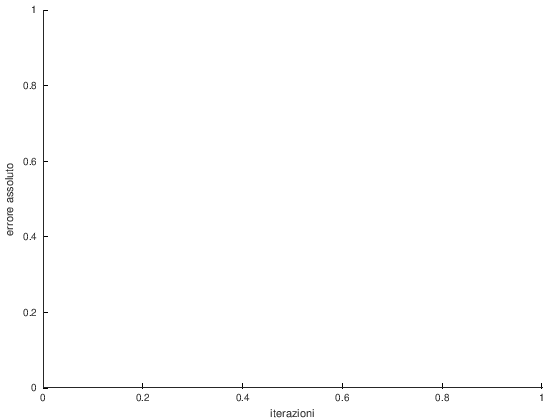

In [9]:
figure
semilogy((1:nit), err_ass, 'ro--', ...
    (1:nit_falsi), err_ass1b, 'go--', ...
    (1:nit_corde), err_ass1c, 'm+--', ...
    (1:nit_tangenti), err_ass1d, 'b*--', ...
    (1:nit_secanti), err_ass1e, 'co--');

xlabel("iterazioni")
ylabel("errore assoluto")
legend("bisezione", "regula falsi", "corde", "tangenti", "secanti");
box off
warning ("off", "Octave:negative-data-log-axis");

### Stima dell'ordine di convergenza per ciascun algoritmo

Si vuole stimare l'ordine di convergenza di un metodo di iterazione del punto fisso.

In [10]:
function [ordine] = stima_ordine(appr, nit)

p = zeros(nit);

for i = 3 : nit - 1
    p(i - 2) = log(abs(appr(i + 1) - appr(i)) / ...
    abs(appr(i) - appr(i - 1))) / ...
        log(abs(appr(i) - appr(i - 1)) / ...
        abs(appr(i - 1) - appr(i - 2)));
end

ordine = p(nit - 3);

end

In [11]:
[bisezione_ordine] = stima_ordine(appr, length(appr))
[regula_falsi_ordine] = stima_ordine(appr_falsi, length(appr_falsi))
[corde_ordine] = stima_ordine(appr_corde, length(appr_corde))
[tangenti_ordine] = stima_ordine(appr_tangenti, length(appr_tangenti))
[secanti_ordine] = stima_ordine(appr_secanti, length(appr_secanti))

bisezione_ordine =  1
regula_falsi_ordine = -0
corde_ordine =  1.0000
error: 'appr_tangenti' undefined near line 1 column 34
secanti_ordine =  1.6933


## Esercizio 2

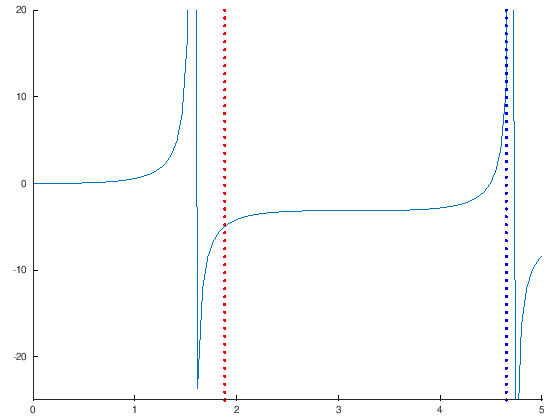

In [64]:
clear a b x tolx tolf fx f
close all

syms x
fx = tan(x) - x;
fx1 = x;

a = 3/5 * pi;
b = 37/25 * pi;

f = function_handle(fx);
df = function_handle(diff(fx, x, 1));

xc = linspace(0, 5);

hold on
plot(xc,feval(f, xc));
plot(a, linspace(-25,20, 50), "r.-");
plot(b, linspace(-25,20, 50), "b.-");
ylim ([-25, 20]);
hold off

In [13]:
tolx = 1e-8;
tolf = 1e-8;
v_nit = zeros(1,1);

[sol, appr, nit] = bisezione(f,a,b,tolx);
appr_par = appr(1:4)

appr_par =

   3.2673   3.9584   4.3040   4.4768



In [14]:
for i = 1:length(appr_par)
    [sol_newton, ~, nit_newton] = newton(f, df, appr_par(i), tolx, ...
        tolf, 1000);
    [sol_secanti, appr_secanti, nit_secanti] = secanti(f,appr_par(i), ...
        a,tolx,tolf,1000);

    fprintf("Valore  dell'innesco x_0: %f\n", appr_par(i));
    fprintf("[Secanti]: approssimazione: %f, iterazioni %i\n", ...
        sol_secanti, nit_secanti);
    fprintf("[Tangenti]: approssimazione: %f, iterazioni %i \n\n", ...
        sol_newton, nit_newton);
end

error: 'newton' undefined near line 2 column 35


A partire dai risultati ottenuti si può osservare la sensibilità sia del metodo di Newton che delle Secanti. Entrambi i metodi hanno convergenza locale, perciò se l'approssimazione dello zero di funzione fornita inizialmente non è abbastanza accurata, i due metodi non convergono alla radice, che in questo caso è pari a: $4.493409$.

Si nota che per i primi due valori di innesco forniti il metodo di Newton non converge. Per i successivi due valori invece converge.
Il metodo delle Secanti converge alla radice solo per l'ultimo valore di innesco fornito mentre nei primi tre casi non converge alla radice richiesta.

## Esercizio 3

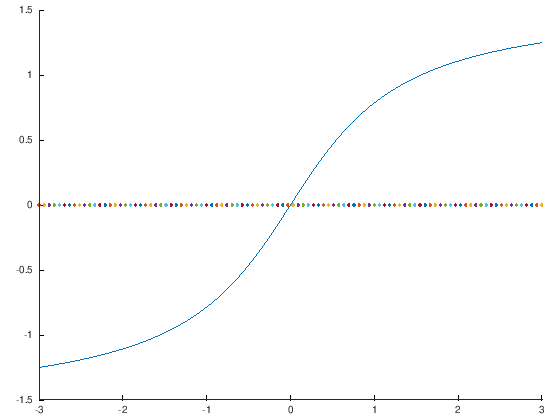

In [15]:
clear a b x tolx tolf fx f
close all
syms x
fx = atan(x);
f = function_handle(fx);
df = function_handle(diff(fx, x, 1));
xc = linspace(-3,3);
hold on
plot(xc, feval(f,xc));

plot(linspace(-3,3), 0);

In [37]:
x_0 = [1.2, 1.4];
tolx = 1.e-6;
tolf = 1.e-5;

for i=1:length(x_0)
    [sol, appr, nit] = newton(f, df, x_0(i), tolx, tolf, 1000);
    fprintf("[Tangenti]: approssimazione: %e, iterazioni %i \n", sol, nit);
end

[Tangenti]: approssimazione: -7.599004e-12, iterazioni 5 
Derivata nulla in x_0, uscita...
[Tangenti]: approssimazione: -4.297215e+08, iterazioni 9 


Il metodo di Newton in entrambi i casi non converge.

## Esercizio 4

In [45]:
clear a b x tolx tolf fx f sol_newton appr_newton nit_newton
close all
syms x
fx = x^3 + x^2 - 33 * x + 63;
f = function_handle(fx);
df = function_handle(diff(fx, x, 1));
x_0 = 1;
tolx = 1.e-12;
tolf = 1.e-12;

In [56]:
[sol_newton, appr_newton, nit_newton] = newton(f, df, x_0, tolx, ...
    tolf,1000);
[sol_mk2, appr_mk2, nit_mk2] = newton_mk2(f, df, x_0, tolx, ...
    tolf, 1000, 2);

fprintf("[Tangenti]: approssimazione: %g, iterazioni %i \n", ...
    sol_newton, nit_newton);
fprintf("[Newton modificato]: approssimazione: %g, iterazioni %i \n", ...
    sol_mk2, nit_mk2);

[Tangenti]: approssimazione: 3, iterazioni 23 
[Newton modificato]: approssimazione: 3, iterazioni 4 


In [60]:
[p1] = stima_ordine(appr_newton, nit_newton);
fprintf("Ordine di convergenza del metodo di Newton: %f\n", p1);

[p2] = stima_ordine(appr_mk2, nit_mk2);
fprintf("Ordine di convergenza del metodo di Newton modificato: %f\n", p2);

Ordine di convergenza del metodo di Newton: 1.000899
Ordine di convergenza del metodo di Newton modificato: 1.996543


Nel caso di radici multiple il metodo di Newton classico ha velocità di convergenza lineare mentre la versione modificata raggiunge ha convergenza quadratica.

## Esercizio 5

In [62]:
% TODO